# Data Preprocessing

In [1]:
# Installing imblearn library
!pip install imblearn

In [1]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# loading the dataset
raw_data = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\raw\Deep Sight Analytics creditcard_cc.csv'
df=pd.read_csv(raw_data)

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking size of creditcard Dataset
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Distribution of the Class')

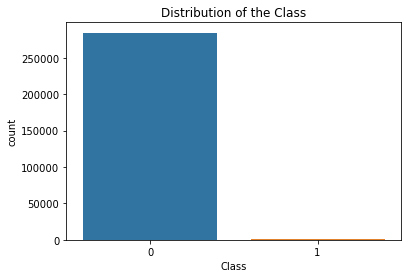

In [6]:
sns.countplot(df['Class'])
plt.title('Distribution of the Class')

In [7]:
def split_dataset(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 0)
    train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
    
    train_output = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\Split_data\Train.csv'
    test_output = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\Split_data\Test.csv'

    # save the train and test file as csv files
    train.to_csv(train_output, index=False)
    test.to_csv(test_output, index=False)
     
    # Printing the shape of train and test data
    print("X_train : ",X_train.shape)
    print("X_test : ",X_test.shape)
    print("y_train : ",y_train.shape)
    print("y_test : ",y_test.shape)
    return X_train, X_test, y_train, y_test

In [8]:
split_dataset(df.drop('Class', axis=1), df['Class'])

X_train :  (213605, 30)
X_test :  (71202, 30)
y_train :  (213605,)
y_test :  (71202,)


(            Time        V1        V2        V3        V4        V5        V6  \
 194763  130747.0  2.047163  0.107987 -1.806515  0.072733  0.248371 -1.744837   
 135660   81344.0  1.282404  0.459864 -0.372286  0.826375  0.463568 -0.466407   
 259186  159004.0 -0.414863  0.012026  1.356386  1.107374  0.813456 -0.156497   
 87387    61662.0 -1.432948  1.478076  0.576724  0.207540 -0.670662 -0.464572   
 267282  162703.0  2.051016 -0.016765 -2.284865  0.302168  0.786895 -0.998558   
 ...          ...       ...       ...       ...       ...       ...       ...   
 211543  138459.0 -1.321976  1.138686 -0.940861  0.154160  0.109802 -0.538822   
 86293    61167.0 -0.627810  0.918729  1.478453  0.213171  0.933695  1.261486   
 122579   76616.0  1.512602 -0.949435 -0.219062 -1.638850 -0.856348 -0.465996   
 152315   97253.0  1.798863 -1.699791 -0.142182 -0.619533 -1.570248  0.083268   
 117952   74887.0 -0.589400  0.747828  1.784781  0.899612  0.257067 -0.001301   
 
               V7        V

## Balancing data 

In [9]:
def oversampling(X_train, y_train):
    sm = SMOTE(sampling_strategy='minority', random_state=7)
    
    train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    
    oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
    oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
    oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
    
    oversampleTrain_output = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\oversampleTrain.csv'

    # save the train and test file
    # again using the '\t' separator to create tab-separated-values files
    oversampled_train.to_csv(oversampleTrain_output, index=False)
    
    print("Before OverSampling, value counts of class variable:\n",train['Class'].value_counts())
    print("After OverSampling, value counts of class variable:\n",oversampled_train['Class'].value_counts())
    
    sns.countplot(oversampled_train['Class'])
    plt.title('Distribution of the Class after SMOTE balancing')
    
    return oversampled_train, oversampled_trainX, oversampled_trainY

Before OverSampling, value counts of class variable:
 0    213233
1       372
Name: Class, dtype: int64
After OverSampling, value counts of class variable:
 0    213233
1    213233
Name: Class, dtype: int64


(        Class           Time         V1        V2         V3        V4  \
 0           0  130747.000000   2.047163  0.107987  -1.806515  0.072733   
 1           0   81344.000000   1.282404  0.459864  -0.372286  0.826375   
 2           0  159004.000000  -0.414863  0.012026   1.356386  1.107374   
 3           0   61662.000000  -1.432948  1.478076   0.576724  0.207540   
 4           0  162703.000000   2.051016 -0.016765  -2.284865  0.302168   
 ...       ...            ...        ...       ...        ...       ...   
 426461      1   35918.464858  -3.863640  4.430372  -4.396129  5.343976   
 426462      1   45475.661675  -0.650924  1.431128  -0.936096  1.299180   
 426463      1   41253.301807 -10.928860  6.402622 -13.315809  8.870815   
 426464      1   59649.223441  -3.434426  0.315842  -1.602072  3.721608   
 426465      1  134239.229024   0.478977 -1.185994  -3.972341  1.861624   
 
                V5        V6         V7        V8  ...       V20       V21  \
 0        0.248371 -

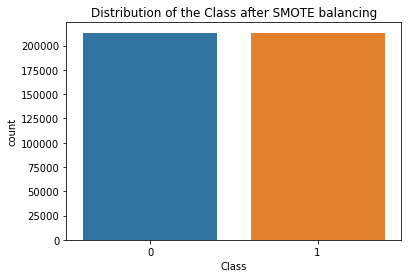

In [11]:
train_data = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\Split_data\Train.csv'
df_train=pd.read_csv(train_data)
oversampling(df_train.drop('Class', axis=1), df_train['Class'])

# Floating

In [12]:
df_train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
oversampleTrain_data = r'D:\College\Term 4\Project\TBC-AIP-2023-A4_Deepsight-Analytics\Data\processed\oversampleTrain.csv'
df_oversample_train=pd.read_csv(oversampleTrain_data)

## Missing value imputation

In [14]:
def missing_value():
    df_train_mean = df_oversample_train.copy()    
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputer.fit_transform(df_train_mean)
    return df_train_mean

df_train_mean = missing_value()

## Scaling data 

In [15]:
# Scale the data using min-max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Min_Max_Scale_df = scaler.fit_transform(df_train_mean)

In [16]:
print(scaler.transform(df_train_mean))

[[0.00000000e+00 7.56672763e-01 9.91791714e-01 ... 6.47520093e-01
  3.38662274e-01 3.91727329e-05]
 [0.00000000e+00 4.70762535e-01 9.76281552e-01 ... 6.49676226e-01
  3.40962224e-01 9.10638856e-05]
 [0.00000000e+00 9.20204639e-01 9.41859072e-01 ... 6.56813590e-01
  3.47069685e-01 3.02698391e-04]
 ...
 [1.00000000e+00 2.38745438e-01 7.28623403e-01 ... 6.45362197e-01
  3.25146070e-01 5.30342250e-03]
 [1.00000000e+00 3.45208247e-01 8.80618934e-01 ... 6.61940094e-01
  3.25431534e-01 6.79445105e-04]
 [1.00000000e+00 7.76883357e-01 9.59987134e-01 ... 6.52414225e-01
  3.46864688e-01 3.35878256e-02]]


In [17]:
print(scaler.data_max_)

[1.00000000e+00 1.72792000e+05 2.45188849e+00 2.20577290e+01
 9.38255843e+00 1.68753440e+01 3.40993093e+01 2.39178371e+01
 4.40544614e+01 2.00072084e+01 1.55949946e+01 2.37451361e+01
 1.20189132e+01 7.84839208e+00 4.56900896e+00 1.05267661e+01
 5.82565432e+00 7.05913181e+00 9.20705854e+00 5.04106919e+00
 5.57211333e+00 3.94209042e+01 2.72028392e+01 1.05030901e+01
 2.25284117e+01 4.02286589e+00 7.51958868e+00 3.46324565e+00
 1.21524011e+01 2.26200722e+01 1.96565300e+04]


In [18]:
# convert the array back to a dataframe
scaler_dataset = pd.DataFrame(Min_Max_Scale_df)
# summarize
print(scaler_dataset.describe())

                  0              1              2              3   \
count  426466.000000  426466.000000  426466.000000  426466.000000   
mean        0.500000       0.506393       0.897595       0.764543   
std         0.500001       0.278219       0.116237       0.044164   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.260707       0.886526       0.740637   
50%         0.500000       0.457894       0.933668       0.753458   
75%         1.000000       0.775464       0.967449       0.775441   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6              7   \
count  426466.000000  426466.000000  426466.000000  426466.000000   
mean        0.696487       0.353475       0.530024       0.480774   
std         0.145407       0.135836       0.057364       0.036645   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.659097       0.2493

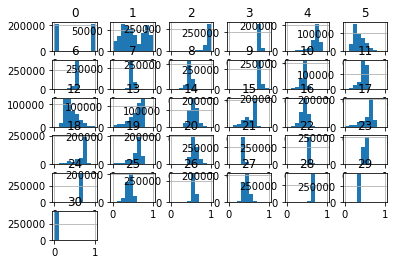

In [19]:
# histograms of the variables
scaler_dataset.hist()
plt.show()